# MEDICIONES SOBRE TIERRA 15/07
nivel de prioridad: $\color{yellow}{Medio}$

$\textbf{Tarea de mariano:}$ Ver si la señal decae como $\frac{1}{r}$, tal como obtuvimos en labo 6

## DECAIMIENTO
En esta seccion vamos a analizar el decaimiento de la señal en funcion de la distancia. 

Siendo:
\begin{cases}
    A_{max}&=Max(|Amplitud|)\\
    E&=\sum(|Pot^2|)\\
\end{cases}

El objetivo es ver si la señal sigue decayendo segun :
\begin{equation}
    E=\frac{A}{r^p}\rightarrow E_{dB}=\underbrace{10\log_{10}(A)}_{a_o}-\underbrace{10p\log_{10}(r)}_{X}
\end{equation}

donde vamos a ajustar los datos obteidos con una funcion lineal y esperamos que $p\sim 1$



In [1]:
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

import os

In [2]:
%run check_import.ipynb
%run to_dB.ipynb
%run to_baseband.ipynb

In [3]:
## Parámetros globales de la antena

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8/'

In [4]:
if portadora== 'Fc7/':
    fc = 7.290e9 # frecuencia portadora
elif portadora== 'Fc8/':
    fc = 8.748e9
else:
    print('Error: portadora debe ser Fc7 o Fc8')

corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

In [8]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'
alturas = ['1/','2/','3/','4/']
target = 'S1'

#correr y ver la long del vector para editar (n_med - 1)
Scal_avg = np.zeros((len(alturas),284), dtype=float)

#COMPLETAR
D = ['cm','cm','cm','cm']

if sistema == 'ubuntu':
     ##----Ubuntu----##
    ##codigo para gordo tony

    #path = '/home/gordotony/Documents/UWB/tesis/mediciones_15_07'
    path = '/home/gordotony/Documents/UWB/tesis/mediciones_09_06/'
    
    for i in range(len(alturas)):
        altura = alturas[i]

        Scal = check_import_ub(path,portadora,altura,target)
        dist = Scal[0,:,0]
        avg  = np.mean(Scal[0:,:,1:],axis=(0,2))

        Scal_avg[i,:] = avg
    
    print(np.shape(Scal_avg))
    
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#

    #path_Scal = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_15_07\S1'
    path = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06'

    for i in range(len(alturas)):
        altura = alturas[i]

        Scal = check_import_win(path,portadora,altura,target)
        dist = Scal[0,:,0]
        avg  = np.mean(Scal[0:,:,1:],axis=(0,2))

        Scal_avg[i,:] = avg
        

    print(np.shape(Scal_avg))
     
    
else:
    print('elegir sistema operativo')


# mediciones = 5

medición  S1  #1 = 285
medición  S1  #2 = 285
medición  S1  #3 = 285
medición  S1  #4 = 285
medición  S1  #5 = 285

iguales, importo datos!!
# mediciones = 5

medición  S1  #1 = 285
medición  S1  #2 = 285
medición  S1  #3 = 285
medición  S1  #4 = 285
medición  S1  #5 = 285

iguales, importo datos!!
# mediciones = 5

medición  S1  #1 = 285
medición  S1  #2 = 285
medición  S1  #3 = 285
medición  S1  #4 = 285
medición  S1  #5 = 285

iguales, importo datos!!
# mediciones = 5

medición  S1  #1 = 285
medición  S1  #2 = 285
medición  S1  #3 = 285
medición  S1  #4 = 285
medición  S1  #5 = 285

iguales, importo datos!!
(4, 284)


<function matplotlib.pyplot.show(close=None, block=None)>

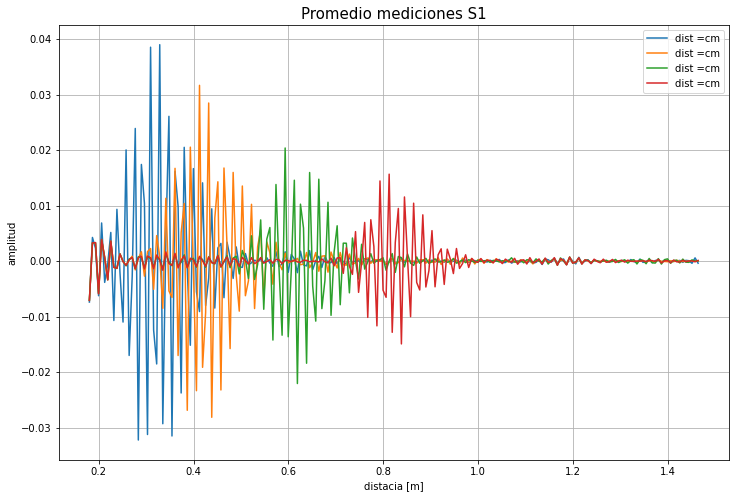

In [9]:
## Grafico S_cal(t) en banda pasante en funcion de la distancia
plt.figure(figsize=(12,8))
for i0 in range(len(alturas)):
    altura = alturas[i0]
    plt.plot(dist[0:200], Scal_avg[i0,0:200], label='dist ='+D[i0])
    
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio mediciones S1', fontsize = 15)
plt.legend(loc="best")
plt.show


## Banda base
no se si es necesario pero repito el procedimiento de labo 6. para ver el decaimiento analizo los datos que tomamos pasandolos a banda base.

<function matplotlib.pyplot.show(close=None, block=None)>

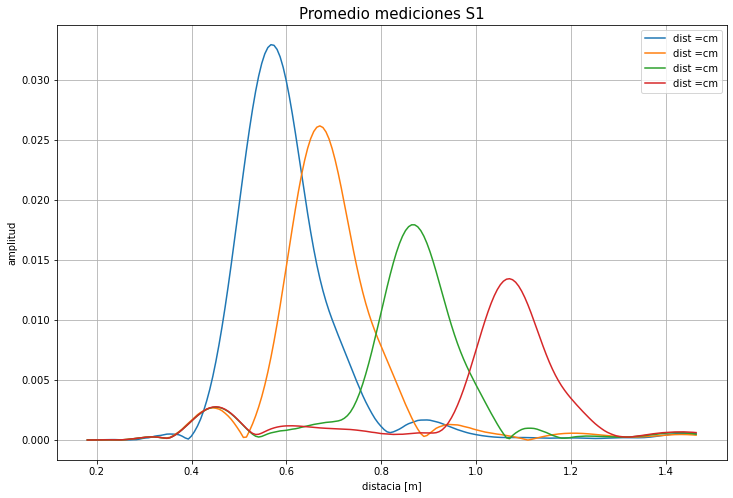

In [10]:
S1_BB = np.zeros_like(Scal_avg, dtype=complex) 

for i0 in range(len(alturas)):
    S1_BB[i0,:] = to_baseband(Scal_avg[i0,:],Ts,BW,fc)

plt.figure(figsize=(12,8))
for i0 in range(len(alturas)):
    plt.plot(dist[0:200], np.abs(S1_BB[i0,0:200]), label='dist ='+D[i0])

plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio mediciones S1', fontsize = 15)
plt.legend(loc="best")
plt.show


Comentario: Por que si se supone que la señal en bada base es la portadora de mi pulso, el valor absoluto hace que me de corrida de donde tego los maximos en banda pasante? - queda para ver

[  0.         -10.14805803]


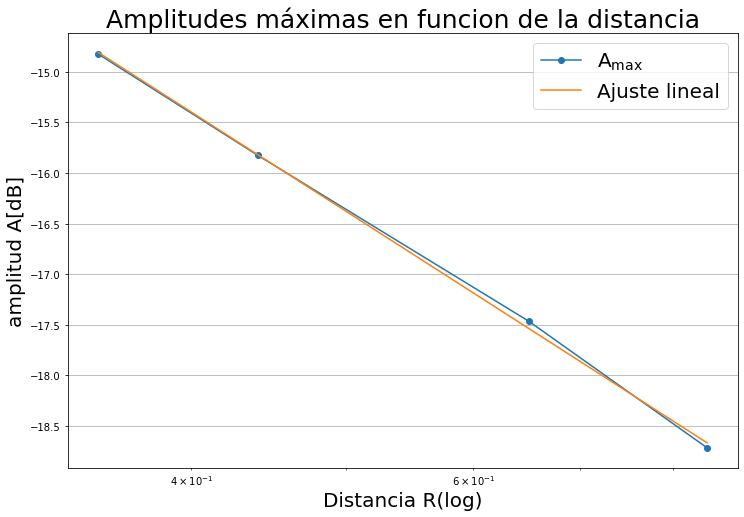

In [11]:
amax_bb = np.max(np.abs(S1_BB), axis=1)
h = (0.35, 0.44, 0.65, 0.84)

lr = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h),np.log10(h))))
y = 10*np.log10(amax_bb)
lr.fit(X[:,:],y[:])
w = lr.coef_
print(w)

ajuste = lr.predict(X)

plt.figure(figsize=(12,8))
plt.title('Amplitudes máximas en funcion de la distancia', fontsize=25)
plt.xlabel('Distancia R(log)', fontsize=20)
plt.ylabel('amplitud A[dB]', fontsize=20)
plt.semilogx(h,10*np.log10(amax_bb),'-o',label='$\mathregular{A_{max}}$')
plt.semilogx(h,ajuste,label='Ajuste lineal')
#plt.plot(np.log10(h),10*np.log10(ebb), '-o')
#plt.plot(np.log10(h),ajuste)
plt.grid('on')
plt.legend(fontsize=20, loc="best")

## Conclusion
Con ese ajuste, el primer valor que obtenemos es la ordenada al origen (que esta bien que de 0 porque esta normalizado) y el segundo valor es X tal que
\begin{align}
    X=&-10*p*log_{10}(r)\\
    COMPLETAR=&-10*p*log_{10}(r)\\
    &\Rightarrow p=COMPLETAR\\
\end{align}

osea la señal de calibracion decae contra la placa como esperabamos 
